In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm

warnings.simplefilter('ignore')
%matplotlib inline

In [22]:
data = pd.read_csv('exoTrain.csv')

In [23]:
data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [4]:
data.columns[data.isna().any()].tolist()

[]

In [5]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [6]:
X

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [7]:
y

0       2
1       2
2       2
3       2
4       2
       ..
5082    1
5083    1
5084    1
5085    1
5086    1
Name: LABEL, Length: 5087, dtype: int64

# PCA

In [8]:
pca = PCA(n_components=0.99)
pca.fit(X)
df = pca.transform(X)

data.shape, df.shape

((5087, 3198), (5087, 13))

Text(0, 0.5, 'cumulative explained variance')

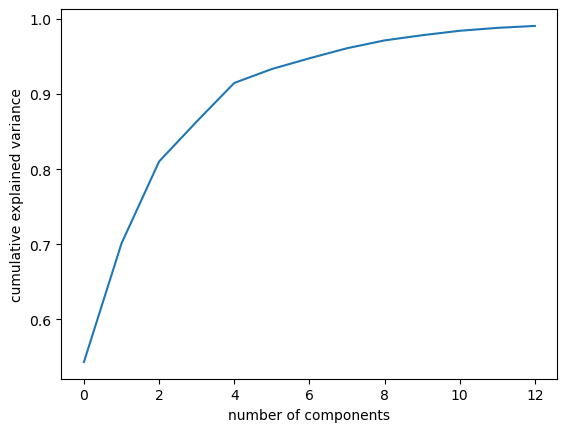

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [10]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-17118.381618,-9499.913501,-7296.752142,-3620.897289,-1591.014817,-4065.915995,-711.455604,1049.192621,-1380.273658,-2364.676009,-1263.265456,-369.794444,-788.670397
1,-17320.754319,-10429.187751,-6595.723626,-4617.471580,-1417.697412,-3012.940417,-464.333969,1908.690487,-669.864330,-2391.866532,-1051.858398,-1354.474265,-885.763272
2,-18701.715911,-8528.953583,-9604.430173,-8051.507917,-4854.561022,-2563.338971,146.856947,2850.251108,1846.098706,-1440.592103,-1113.132106,-931.093781,-1061.561537
3,-17018.673864,-9954.822132,-6867.966350,-4890.353092,-2509.784733,-3282.593390,-438.307806,1102.462027,-806.251780,-2489.250126,-1087.828749,-1455.107821,-919.133497
4,-15370.335990,-15875.503503,-10508.694448,481.911654,7453.100233,-6444.769774,-274.807484,1469.613135,837.924523,-1299.059347,-1099.661210,-1299.634089,-1057.505691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-14384.422169,-10552.728008,-6221.481720,-3985.519770,-905.022086,-3712.870181,-444.765717,1336.966777,-167.845770,-2596.097298,-1020.913507,-1370.576897,-812.355366
5083,-16234.711556,-8695.232033,-7355.812397,-4783.406199,303.109220,-4293.545384,-334.009068,1540.234627,473.149551,-1710.719773,-102.878324,1148.419498,-619.175581
5084,-17131.557875,-9538.888541,-6848.644377,-5344.463423,-758.393711,-3687.115526,-628.744805,1630.464146,-1024.893942,-2158.508801,-393.151632,-1441.684849,-892.841141
5085,-16976.559919,-9606.816261,-6998.530257,-4395.311402,-1078.238223,-3372.379823,-395.826239,1743.642203,-656.543165,-2416.784622,-1213.744110,-1177.626150,-907.943725


In [11]:
profile = ProfileReport(df)
profile.to_file('profile.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

0        AxesSubplot(0.125,0.786098;0.352273x0.0939024)
1     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
2        AxesSubplot(0.125,0.673415;0.352273x0.0939024)
3     AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
4        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
5     AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
6        AxesSubplot(0.125,0.448049;0.352273x0.0939024)
7     AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
8        AxesSubplot(0.125,0.335366;0.352273x0.0939024)
9     AxesSubplot(0.547727,0.335366;0.352273x0.0939024)
10       AxesSubplot(0.125,0.222683;0.352273x0.0939024)
11    AxesSubplot(0.547727,0.222683;0.352273x0.0939024)
12           AxesSubplot(0.125,0.11;0.352273x0.0939024)
dtype: object

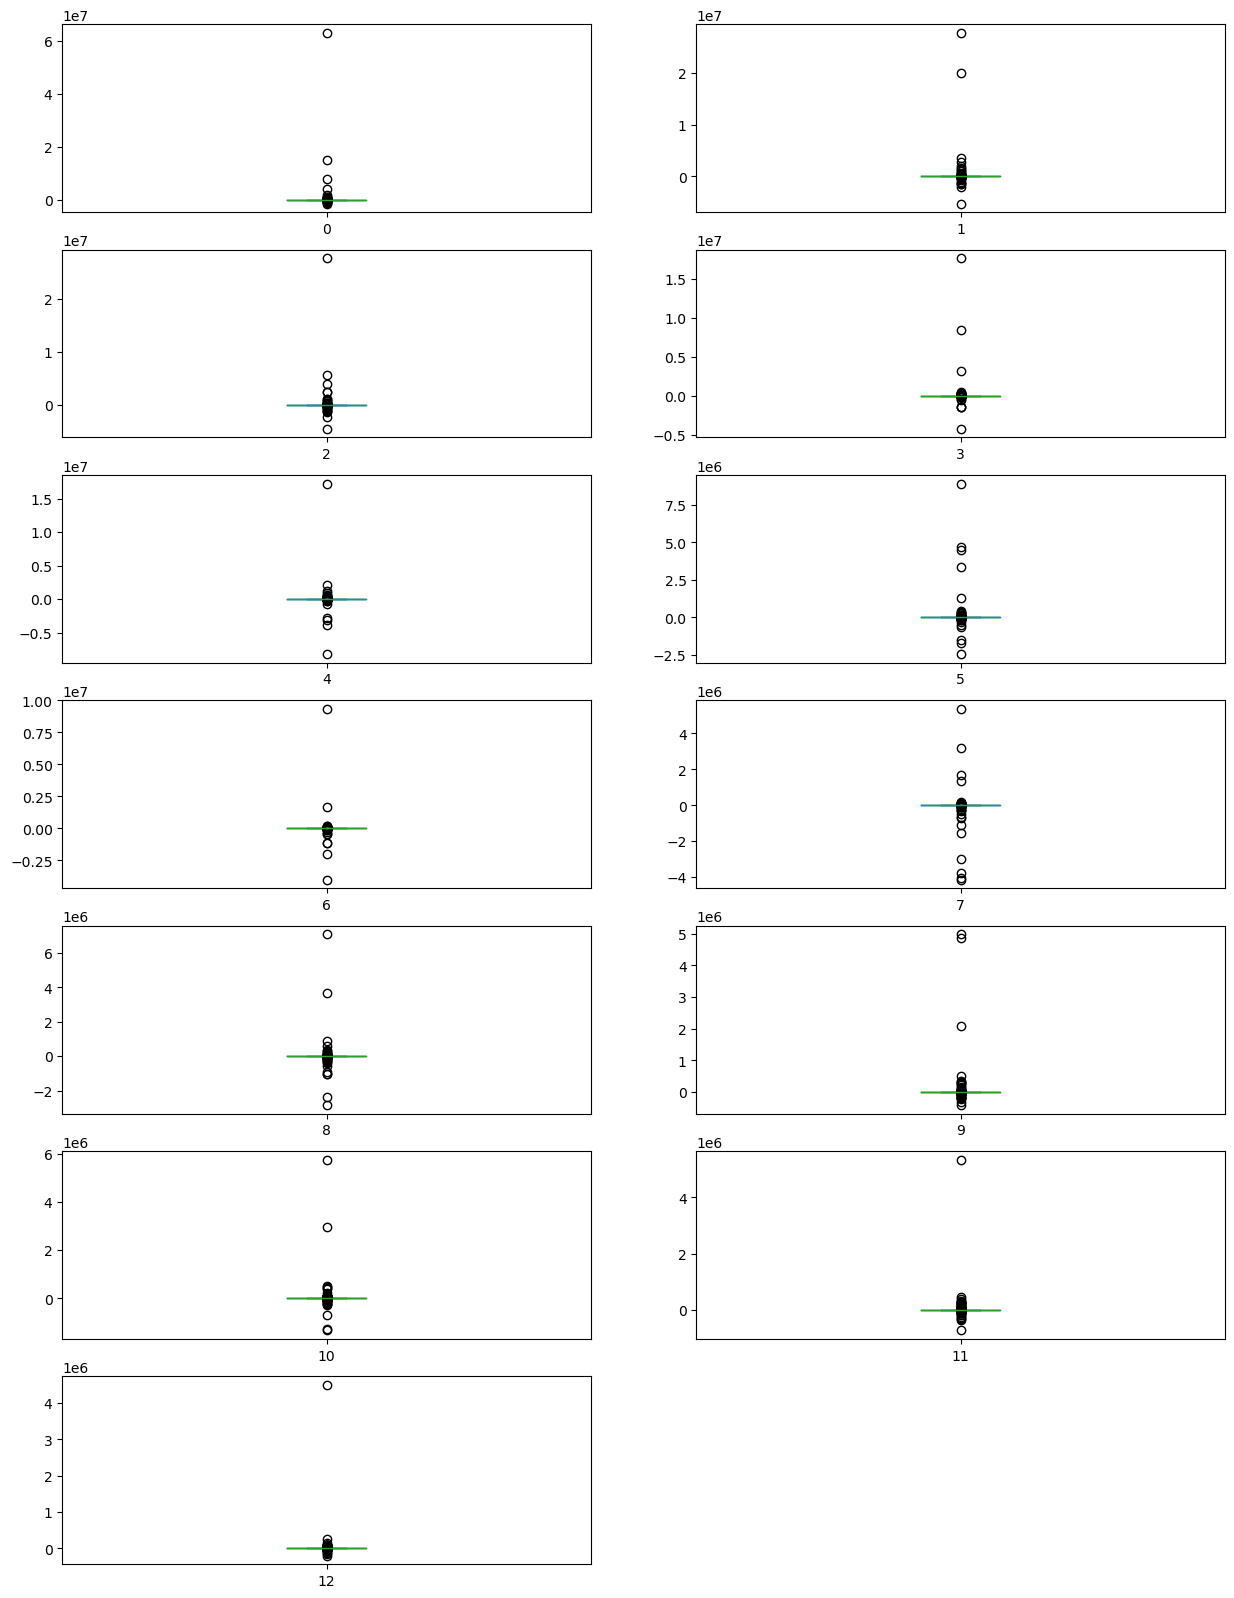

In [12]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [13]:
df.shape

(5087, 13)

In [14]:
ext = ExtraTreesClassifier()
ext.fit(X,y)
ext.feature_importances_

array([8.40769843e-04, 6.53799846e-04, 6.46516294e-05, ...,
       4.47089940e-04, 6.27311665e-04, 6.57202196e-04])

<AxesSubplot:>

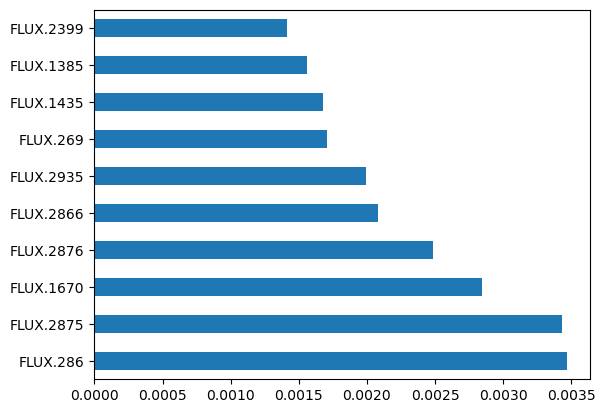

In [15]:
rank = pd.Series(ext.feature_importances_, index=X.columns)
rank.nlargest(10).plot(kind='barh')

# Almost similar importance

## Checking ratio of output feature - imbalance checking

In [24]:
y.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [18]:
sm = SMOTETomek(random_state=42)

In [19]:
Xnew, ynew = sm.fit_resample(X,y)

In [26]:
print('OG : ' + str(Counter(y)))
print('After Sampling : ' + str(Counter(ynew)))

OG : Counter({1: 5050, 2: 37})
After Sampling : Counter({2: 5050, 1: 5050})


In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnew, ynew, train_size=0.7, random_state=42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(7070, 3197) (3030, 3197) (7070,) (3030,)


## Random Forest

In [29]:
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)
accuracy_score(ytest, rf.predict(Xtest))

0.999009900990099

In [30]:
confusion_matrix(ytest, rf.predict(Xtest))

array([[1561,    3],
       [   0, 1466]], dtype=int64)

## HistGBM

In [31]:
hist = HistGradientBoostingClassifier()
hist.fit(Xtrain, ytrain)
accuracy_score(ytest, hist.predict(Xtest))

0.9986798679867986

## XGB

In [38]:
ytrain_c = LabelEncoder().fit_transform(ytrain)
ytest_c = LabelEncoder().fit_transform(ytest)

In [39]:
xgb = XGBClassifier()
xgb.fit(Xtrain, ytrain_c)
accuracy_score(ytest_c, xgb.predict(Xtest))

0.999009900990099

## Lightgbm

In [41]:
lgbm = lightgbm.LGBMClassifier()

In [42]:
lgbm.fit(Xtrain, ytrain)
accuracy_score(ytest, lgbm.predict(Xtest))

0.9986798679867986

## Decision Trees

In [44]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain,ytrain)
accuracy_score(ytest_c, dt.predict(Xtest))

0.007920792079207921

## Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
accuracy_score(ytest, lr.predict(Xtest))

0.8148514851485148

## SVM

In [47]:
svm = NuSVC()
svm.fit(Xtrain, ytrain)
accuracy_score(ytest, svm.predict(Xtest))

0.9706270627062706

## KNN

In [48]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
accuracy_score(ytest, knn.predict(Xtest))

0.9834983498349835

## Top 3 algorithms (without parameter tuning)- 

1. Random Forest/XGBoost
2. Light Gradient Boosting
3. K-Nearest Neighbors

## Future Scope - 

### Using advanced neural networks